In [25]:
import numpy as np
from tqdm import tqdm
from boltzmann_machine import BoltzmannMachine
import matplotlib.pyplot as plt
from utils import generate_binary_vectors, get_shifterProb_envStates, get_shiftprob_weight_mask
import plotly.express as px

In [3]:
shifterProb_metadata = {
    'batch_size': 20,
    'vis_grp_size': 8,
    'on_bit_prob': 0.3
}

num_hnodes = 24

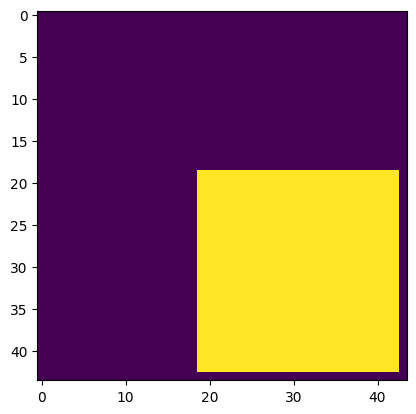

In [4]:
env_states = get_shifterProb_envStates(shifterProb_metadata['vis_grp_size'])
weight_mask = get_shiftprob_weight_mask(shifterProb_metadata['vis_grp_size'], num_hnodes)

plt.imshow(weight_mask)

In [6]:
env_states.shape, weight_mask.shape

((768, 19), (44, 44))

In [76]:
bm = BoltzmannMachine(env_states, 
                      num_hnodes, 
                      weight_mask=weight_mask, 
                      # init_W=bm.W,
                      noisy_clamping=False,
                      # num_noisyEnvState_per_envState=1,
                    #   off_bit_noise=0.02,
                      # log_freq=10,
                      shifterProb_metadata=shifterProb_metadata,
                      detailed_log=False, 
                      save_debug_data=False,
                      run_loop_count=1
                     )
# bm.equil_time_temp = (100, 10)

bm.learn(50)

  0%|          | 0/50 [00:00<?, ?it/s]

20 ------ 1 W_range: (0.0, 0.0)
20 ------ 1 W_range: (-2.0, 2.0)
20 ------ 6 W_range: (-4.0, 4.0)
19 ------ 2 W_range: (-6.0, 6.0)
20 ------ 0 W_range: (-8.0, 4.0)
16 ------ 4 W_range: (-10.0, 6.0)
18 ------ 5 W_range: (-12.0, 8.0)
5 ------ 10 W_range: (-14.0, 6.0)
14 ------ 6 W_range: (-16.0, 8.0)
3 ------ 13 W_range: (-14.0, 10.0)
3 ------ 7 W_range: (-16.0, 8.0)
2 ------ 0 W_range: (-18.0, 10.0)
2 ------ 3 W_range: (-20.0, 8.0)
1 ------ 2 W_range: (-20.0, 10.0)
1 ------ 2 W_range: (-22.0, 8.0)
2 ------ 3 W_range: (-22.0, 10.0)
3 ------ 7 W_range: (-24.0, 12.0)
2 ------ 2 W_range: (-26.0, 10.0)
5 ------ 0 W_range: (-28.0, 8.0)
4 ------ 3 W_range: (-28.0, 10.0)
3 ------ 12 W_range: (-28.0, 12.0)
4 ------ 2 W_range: (-30.0, 10.0)
2 ------ 2 W_range: (-32.0, 12.0)
1 ------ 2 W_range: (-32.0, 10.0)
2 ------ 0 W_range: (-34.0, 12.0)
4 ------ 4 W_range: (-34.0, 12.0)
2 ------ 3 W_range: (-36.0, 12.0)
1 ------ 2 W_range: (-36.0, 14.0)
4 ------ 1 W_range: (-36.0, 12.0)
6 ------ 5 W_range: (-

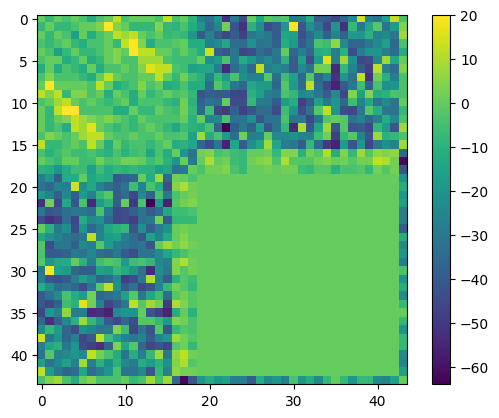

In [66]:
plt.imshow(bm.W)
plt.colorbar()

In [67]:
px.imshow(bm.W)

### Evaluation

In [ ]:
bm_test = BoltzmannMachine(env_states, 
                            num_hnodes, 
                            init_W=bm.W,
                            run_loop_count=1
                            )

bm_test.equil_time_temp = (1000, 10)

test_res = []
for env_state in tqdm(env_states):
    ans = env_state[-3:]

    query = env_state.copy()
    query[-3:] = -1

    equi_samples = bm_test.search(query)
    
    uniqs, uniqs_counts = np.unique(equi_samples[:, -3-num_hnodes-1:-num_hnodes-1], return_counts=True, axis=0)
    pred = uniqs[np.argmax(uniqs_counts)]
    is_correct = (pred==ans).all()
    # print(uniqs, uniqs_counts, is_correct)
    test_res.append(is_correct)

print(f'Result: {sum(test_res)}')

IndexError: list index out of range

In [73]:
one_counts = (env_states[:, :shifterProb_metadata['vis_grp_size']]==1).sum(axis=1)
test_res = np.array(test_res)

for count in range(0, 9):
    idxs_ = np.nonzero(one_counts==count)[0]
    print(count, test_res[idxs_].sum()/len(idxs_))
    

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
